In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Dataset.csv", sep=";", na_values="Unknown")

In [3]:
df = data.copy()
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
df.drop('CLIENTNUM', 1, inplace=True)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [5]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [6]:
df["Attrition_Flag"].value_counts(normalize=True)*100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

Nous avons deux modalités pour la variable cible `Attrition_Flag`

- **Existing Customer**: 0
- **Attrited Customer**: 1

***On remarque une forte inegalité entre les proportions des modalités***

In [7]:
df["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', nan], dtype=object)

 La variable `Income_Category` correspond aux grilles salariales

### Informations sur les variables de types Object

In [8]:
for col in df.select_dtypes('object').columns:
        print(f"Modalité de {col}:\n{df[col].unique()}\n\n")

Modalité de Attrition_Flag:
['Existing Customer' 'Attrited Customer']


Modalité de Gender:
['M' 'F']


Modalité de Education_Level:
['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate']


Modalité de Marital_Status:
['Married' 'Single' nan 'Divorced']


Modalité de Income_Category:
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +' nan]


Modalité de Card_Category:
['Blue' 'Gold' 'Silver' 'Platinum']




In [9]:
for col in df.select_dtypes('object').columns:
        print(f"Stat des modalités de {col}:\n{df[col].value_counts(normalize=True)*100}\n\n")

Stat des modalités de Attrition_Flag:
Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64


Stat des modalités de Gender:
F    52.908068
M    47.091932
Name: Gender, dtype: float64


Stat des modalités de Education_Level:
Graduate         36.338290
High School      23.385223
Uneducated       17.274628
College          11.768123
Post-Graduate     5.994424
Doctorate         5.239312
Name: Education_Level, dtype: float64


Stat des modalités de Marital_Status:
Married     49.978673
Single      42.045212
Divorced     7.976114
Name: Marital_Status, dtype: float64


Stat des modalités de Income_Category:
Less than $40K    39.500832
$40K - $60K       19.855796
$80K - $120K      17.027177
$60K - $80K       15.551858
$120K +            8.064337
Name: Income_Category, dtype: float64


Stat des modalités de Card_Category:
Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: Card_Category, dtype: float64




### Pourcentage de données manquantes par variable

In [10]:
(df.isna().sum()/df.shape[0])*100

Attrition_Flag               0.000000
Customer_Age                 0.000000
Gender                       0.000000
Dependent_count              0.000000
Education_Level             14.999506
Marital_Status               7.396070
Income_Category             10.980547
Card_Category                0.000000
Months_on_book               0.000000
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       0.000000
Contacts_Count_12_mon        0.000000
Credit_Limit                 0.000000
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              0.000000
Total_Amt_Chng_Q4_Q1         0.000000
Total_Trans_Amt              0.000000
Total_Trans_Ct               0.000000
Total_Ct_Chng_Q4_Q1          0.000000
Avg_Utilization_Ratio        0.000000
dtype: float64

Il n'y a pas de valeur manquante dans les variables quantitatives.

Seule trois variables possèdent des donnés manquante dont le pourcentage est inférieur à 15%

In [11]:
df_line = df.shape
# Récupperer le nombre de lignes manquantes
index_with_nan = df.index[df.isnull().any(axis=1)]
nbr_df_nan = len(np.array(index_with_nan).reshape(-1, 1))
print(f"Ligne du dataframe: {df_line[0]}")
print(f"Nombre de ligne manquante: {nbr_df_nan} \nRatio de ligne manquante: {(nbr_df_nan/df_line[0])*100}")

Ligne du dataframe: 10127
Nombre de ligne manquante: 3046 
Ratio de ligne manquante: 30.07800928211711


In [12]:
# Suppresion des données manquantes
df.drop(index_with_nan, 0, inplace=True)
df.shape[0]

7081

In [13]:
(df.isna().sum()/df.shape[0])*100

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

Il n' y a plus de données manquantes Dataset

### Donnée entraînement et de test

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
trainset, testset = train_test_split(df, test_size=0.25, random_state=0, stratify=df['Attrition_Flag'])

In [16]:
# On fait une découpe en respectant la repartition des données
train = trainset['Attrition_Flag'].value_counts(normalize=True)
test = testset['Attrition_Flag'].value_counts(normalize=True)
print(f"Donnée d'entrainement:\n{train}\n\n")
print(f"Donnée de test:\n{test}")

Donnée d'entrainement:
Existing Customer    0.84275
Attrited Customer    0.15725
Name: Attrition_Flag, dtype: float64


Donnée de test:
Existing Customer    0.843027
Attrited Customer    0.156973
Name: Attrition_Flag, dtype: float64


In [17]:
trainset

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4049,Existing Customer,44,M,0,High School,Single,$40K - $60K,Blue,33,5,1,3,2337.0,1442,895.0,0.659,3945,65,0.548,0.617
5678,Existing Customer,43,M,1,High School,Single,$60K - $80K,Blue,31,5,3,2,2834.0,1720,1114.0,0.620,4581,70,0.591,0.607
8379,Attrited Customer,45,F,2,Graduate,Single,Less than $40K,Blue,33,1,3,4,1492.0,0,1492.0,0.502,2469,38,0.267,0.000
4817,Existing Customer,40,F,4,Graduate,Single,Less than $40K,Gold,20,6,4,3,15987.0,1965,14022.0,0.722,4542,70,0.591,0.123
9144,Attrited Customer,39,M,2,College,Married,$60K - $80K,Blue,26,1,2,2,3879.0,0,3879.0,0.928,7786,81,0.929,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,Existing Customer,57,M,2,Uneducated,Married,$80K - $120K,Blue,52,6,2,4,10974.0,0,10974.0,0.591,1327,26,1.000,0.000
8546,Existing Customer,38,F,4,College,Single,Less than $40K,Blue,27,2,3,3,1438.3,0,1438.3,0.721,4564,79,0.717,0.000
4734,Existing Customer,50,F,0,Graduate,Married,Less than $40K,Blue,43,4,1,2,2393.0,1499,894.0,0.784,4755,82,0.745,0.626
4984,Existing Customer,52,F,3,Graduate,Married,Less than $40K,Blue,39,4,3,3,2001.0,909,1092.0,0.772,4238,63,0.800,0.454


In [18]:
Y_train = trainset['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
X_train = trainset.drop('Attrition_Flag', axis=1)

In [19]:
trainset['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [20]:
for col in X_train.select_dtypes('object').columns:
        print(f"Stat des modalités de {col}:\n{X_train[col].value_counts(normalize=True)*100}\n\n")

Stat des modalités de Gender:
M    52.033898
F    47.966102
Name: Gender, dtype: float64


Stat des modalités de Education_Level:
Graduate         36.817326
High School      23.220339
Uneducated       17.118644
College          11.939736
Post-Graduate     5.875706
Doctorate         5.028249
Name: Education_Level, dtype: float64


Stat des modalités de Marital_Status:
Married     50.470810
Single      41.544256
Divorced     7.984934
Name: Marital_Status, dtype: float64


Stat des modalités de Income_Category:
Less than $40K    39.566855
$40K - $60K       19.792844
$80K - $120K      16.817326
$60K - $80K       15.593220
$120K +            8.229755
Name: Income_Category, dtype: float64


Stat des modalités de Card_Category:
Blue        93.069680
Silver       5.593220
Gold         1.167608
Platinum     0.169492
Name: Card_Category, dtype: float64




### Encodage des variable qualitatives ordinales

In [21]:

def encode_features_ordinal(dataframe):
    '''
    Fonction permetant d'encoder des variables qualitatives ordinales
    :param dataframe: Fournir un dataframe
    :param variable: Fournir la liste de variable
    '''
    features_ordinals = ['Education_Level', 'Income_Category', 'Card_Category']
    modalite = {
    'Uneducated': 0,
    'College': 1,
    'High School': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5,
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4,
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
    }
    for col in features_ordinals:
        if dataframe[col].dtype == object:
            dataframe.loc[:,col] = dataframe[col].map(modalite)

In [22]:
encode_features_ordinal(X_train)
X_train

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4049,44,M,0,2,Single,1,0,33,5,1,3,2337.0,1442,895.0,0.659,3945,65,0.548,0.617
5678,43,M,1,2,Single,2,0,31,5,3,2,2834.0,1720,1114.0,0.620,4581,70,0.591,0.607
8379,45,F,2,3,Single,0,0,33,1,3,4,1492.0,0,1492.0,0.502,2469,38,0.267,0.000
4817,40,F,4,3,Single,0,2,20,6,4,3,15987.0,1965,14022.0,0.722,4542,70,0.591,0.123
9144,39,M,2,1,Married,2,0,26,1,2,2,3879.0,0,3879.0,0.928,7786,81,0.929,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,57,M,2,0,Married,3,0,52,6,2,4,10974.0,0,10974.0,0.591,1327,26,1.000,0.000
8546,38,F,4,1,Single,0,0,27,2,3,3,1438.3,0,1438.3,0.721,4564,79,0.717,0.000
4734,50,F,0,3,Married,0,0,43,4,1,2,2393.0,1499,894.0,0.784,4755,82,0.745,0.626
4984,52,F,3,3,Married,0,0,39,4,3,3,2001.0,909,1092.0,0.772,4238,63,0.800,0.454


In [23]:
(df.isna().sum()/df.shape[0])*100

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

### Encodage des variable qualitatives nominales

In [24]:
def encodin_nominale(datframe):
    """
    Fonction permetant de faire l'encodage des varibles qualitative nominale 
    en supprimant la variable dependante
    """
    features_nominals = ['Marital_Status', 'Gender']
    
    for var in features_nominals:
        if datframe[var].dtypes == 'object':
            modalite = datframe[var].unique()
            for index, mod in enumerate(modalite):
                if index == 0:
                    continue
                datframe[mod] = np.where(datframe[var]==mod, 1, 0)
            datframe.drop(columns=var,axis=1,inplace=True)

In [25]:
encodin_nominale(X_train)
X_train

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Married,Divorced,F
4049,44,0,2,1,0,33,5,1,3,2337.0,1442,895.0,0.659,3945,65,0.548,0.617,0,0,0
5678,43,1,2,2,0,31,5,3,2,2834.0,1720,1114.0,0.620,4581,70,0.591,0.607,0,0,0
8379,45,2,3,0,0,33,1,3,4,1492.0,0,1492.0,0.502,2469,38,0.267,0.000,0,0,1
4817,40,4,3,0,2,20,6,4,3,15987.0,1965,14022.0,0.722,4542,70,0.591,0.123,0,0,1
9144,39,2,1,2,0,26,1,2,2,3879.0,0,3879.0,0.928,7786,81,0.929,0.000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,57,2,0,3,0,52,6,2,4,10974.0,0,10974.0,0.591,1327,26,1.000,0.000,1,0,0
8546,38,4,1,0,0,27,2,3,3,1438.3,0,1438.3,0.721,4564,79,0.717,0.000,0,0,1
4734,50,0,3,0,0,43,4,1,2,2393.0,1499,894.0,0.784,4755,82,0.745,0.626,1,0,1
4984,52,3,3,0,0,39,4,3,3,2001.0,909,1092.0,0.772,4238,63,0.800,0.454,1,0,1


### Normalisation des variables quantitatives

In [26]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [27]:
def get_numeric_features(dataframe):
    colonnes = []
    for col in df.columns:
        if dataframe[col].dtypes == 'int64' or dataframe[col].dtypes == 'float64':
            colonnes.append(col)
    return colonnes

In [28]:
def numeric_transformer(dataframe):
    # nous stockons d'abord le nom des colonnes quantitatives
    numeric_features = get_numeric_features(df)
    # nous appliquons à ces colonnes une transformation
    scaler = StandardScaler()

    for col in numeric_features:
        dataframe[col] = scaler.fit_transform(np.array(dataframe[col]).reshape(-1, 1))

In [29]:
numeric_transformer(X_train)
X_train

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Married,Divorced,F
4049,-0.290916,-1.805478,2,1,0,-0.368741,0.769981,-1.357663,0.488220,-0.672809,0.340101,-0.702764,-0.456738,-0.121461,0.029668,-0.687753,1.193392,0,0,0
5678,-0.414923,-1.030513,2,2,0,-0.619142,0.769981,0.656640,-0.416649,-0.618674,0.683010,-0.678912,-0.632505,0.062564,0.240847,-0.506291,1.157690,0,0,0
8379,-0.166908,-0.255549,3,0,0,-0.368741,-1.825955,0.656640,1.393089,-0.764849,-1.438588,-0.637744,-1.164311,-0.548539,-1.110694,-1.873583,-1.009413,0,0,1
4817,-0.786946,1.294381,3,0,2,-1.996351,1.418965,1.663792,0.488220,0.813997,0.985215,0.726917,-0.172807,0.051280,0.240847,-0.506291,-0.570281,0,0,1
9144,-0.910953,-0.255549,1,2,0,-1.245146,-1.825955,-0.350512,-0.416649,-0.504849,-1.438588,-0.377772,0.755601,0.989925,0.705439,0.920080,-1.009413,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,1.321182,-0.255549,0,3,0,2.010073,1.418965,-0.350512,1.393089,0.267963,-1.438588,0.394955,-0.763203,-0.878974,-1.617522,1.219703,-1.009413,1,0,0
8546,-1.034961,1.294381,1,0,0,-1.119945,-1.176971,0.656640,0.488220,-0.770698,-1.438588,-0.643592,-0.177314,0.057646,0.620967,0.025433,-1.009413,0,0,1
4734,0.453130,-1.805478,3,0,0,0.883267,0.120997,-1.357663,-0.416649,-0.666709,0.410410,-0.702873,0.106617,0.112911,0.747674,0.143594,1.225523,1,0,1
4984,0.701145,0.519416,3,0,0,0.382464,0.120997,0.656640,0.488220,-0.709407,-0.317348,-0.681308,0.052535,-0.036682,-0.054803,0.375696,0.611451,1,0,1


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log = LogisticRegression(random_state=0)
log.fit(X_train, Y_train)
print(f"Score sur les données d'entrainements: {log.score(X_train, Y_train)}")

Score sur les données d'entrainements: 0.9030131826741996


In [32]:
Y_test = testset['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
X_test = testset.drop('Attrition_Flag', axis=1)

In [33]:
encode_features_ordinal(X_test)

In [34]:
encodin_nominale(X_test)

In [35]:
numeric_transformer(X_test)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import sklearn.metrics as metrics

In [37]:
model_tree = DecisionTreeClassifier(random_state=0)

In [38]:
model_svc = SVC(random_state=0)

In [39]:
model_boost = AdaBoostClassifier(random_state=0)

In [40]:
modele_rf = RandomForestClassifier(random_state=0)

In [41]:
dict_of_models = {'RandomForest': modele_rf,
                  'AdaBoost' : model_boost,
                  'SVM': model_svc,
                  'LogisticRegression': log,
                  'DecisionTreeClassifier': DecisionTreeClassifier
                 }

In [42]:
def evaluation(model):
    
    model.fit(X_train, Y_train)
    ypred = model.predict(X_test)
    
    print(f"Entraînement: {model.score(X_train, Y_train)}\nTest: {model.score(X_test, Y_test)}")
    print(pd.DataFrame(confusion_matrix(Y_test, ypred)))
    print(classification_report(Y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, Y_train,
                                               cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 5))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.title(model, fontsize=24)
    plt.legend()

RandomForest
Entraînement: 1.0
Test: 0.948051948051948
      0    1
0  1475   18
1    74  204
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1493
           1       0.92      0.73      0.82       278

    accuracy                           0.95      1771
   macro avg       0.94      0.86      0.89      1771
weighted avg       0.95      0.95      0.95      1771

AdaBoost
Entraînement: 0.9625235404896422
Test: 0.9497459062676454
      0    1
0  1456   37
1    52  226
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1493
           1       0.86      0.81      0.84       278

    accuracy                           0.95      1771
   macro avg       0.91      0.89      0.90      1771
weighted avg       0.95      0.95      0.95      1771

SVM
Entraînement: 0.9427495291902072
Test: 0.9209486166007905
      0    1
0  1462   31
1   109  169
              precision    recall  f1-score  

TypeError: fit() missing 1 required positional argument: 'y'

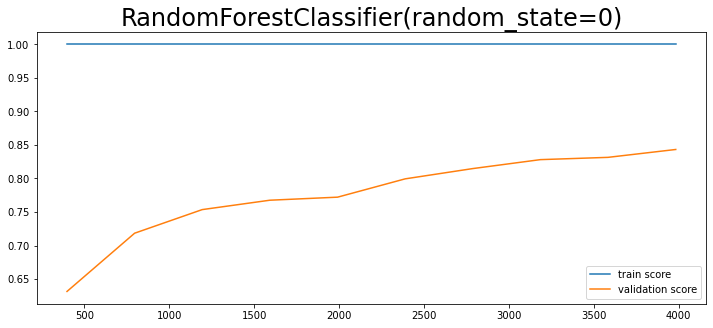

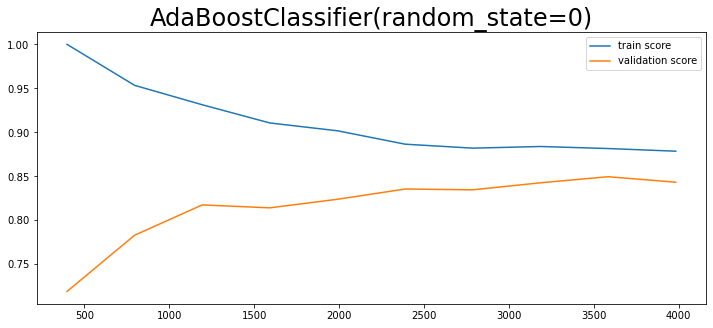

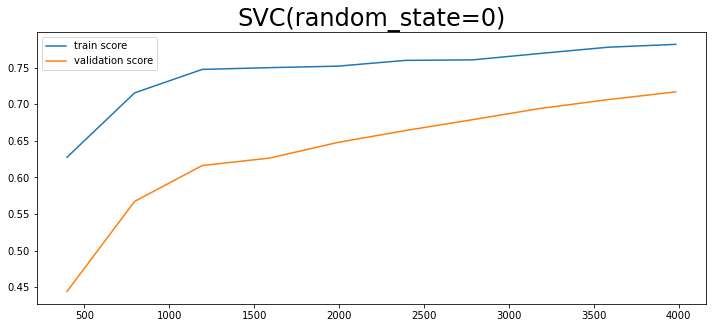

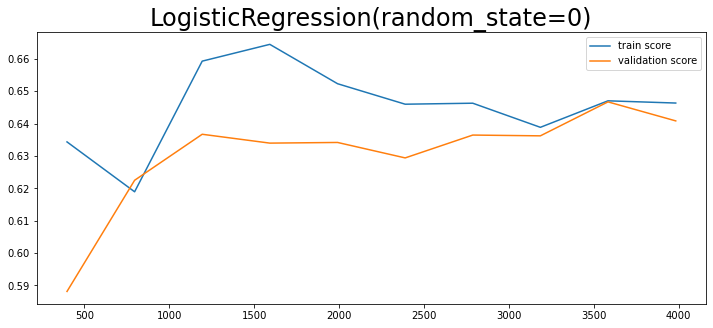

In [43]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [ ]:
from sklearn.metrics import roc_curve

In [48]:
import matplotlib.pyplot as plt

In [49]:
preds = model_boost.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

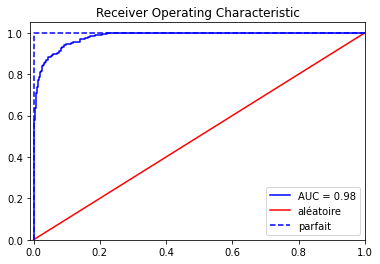

In [54]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

# modèle aléatoire
plt.plot([0, 1], [0, 1],"r-", label="aléatoire", )

# modèle parfait
plt.plot([0,0, 1], [0,1, 1], 'b--', label="parfait")

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()